In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

In [4]:
!pip install wget

In [5]:
import wget

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-06-20 16:23:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-06-20 16:23:48 (277 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [7]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Prepare data

In [8]:
sentences = []
label = []

for item in datastore:
    sentences.append(item["headline"])
    label.append(item["is_sarcastic"])

# Split data into training set and testing set

In [9]:
training_sentences = sentences[0:20000]
testing_sentences = sentences[20000:]
training_label = label[0:20000]
testing_label = label[20000:]

# Tokenizer and padding sequences

In [10]:
tokenizer = Tokenizer(num_words = 10000, oov_token = "<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = 100, padding = "post", truncating = "post")

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = 100, padding = "post", truncating = "post")

# Convert data to array for training model

In [11]:
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
training_label = np.array(training_label)
testing_label = np.array(testing_label)

# Create model

In [12]:
def createModel():
    model = Sequential()
    model.add(Embedding(input_dim = 10000, output_dim = 16, input_length = 100))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(24, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))
    
    return model

In [13]:
model = createModel()

In [14]:
model.compile(
        loss = "binary_crossentropy",
        optimizer = "adam",
        metrics = ["acc"]
    )

# Training model

In [15]:
history = model.fit(
      training_padded,
      training_label,
      epochs = 30,
      validation_data = (testing_padded, testing_label),
      verbose = 1,
)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
20000/20000 [==============================] - 4s 222us/sample - loss: 0.6790 - acc: 0.5634 - val_loss: 0.6405 - val_acc: 0.6108
Epoch 2/30
20000/20000 [==============================] - 4s 182us/sample - loss: 0.4809 - acc: 0.8003 - val_loss: 0.4031 - val_acc: 0.8314
Epoch 3/30
20000/20000 [==============================] - 4s 186us/sample - loss: 0.3294 - acc: 0.8681 - val_loss: 0.3802 - val_acc: 0.8269
Epoch 4/30
20000/20000 [==============================] - 4s 186us/sample - loss: 0.2746 - acc: 0.8917 - val_loss: 0.3486 - val_acc: 0.8504
Epoch 5/30
20000/20000 [==============================] - 4s 186us/sample - loss: 0.2385 - acc: 0.9079 - val_loss: 0.3429 - val_acc: 0.8529
Epoch 6/30
20000/20000 [==============================] - 4s 186us/sample - loss: 0.2097 - acc: 0.9198 - val_loss: 0.3441 - val_acc: 0.8532
Epoch 7/30
20000/

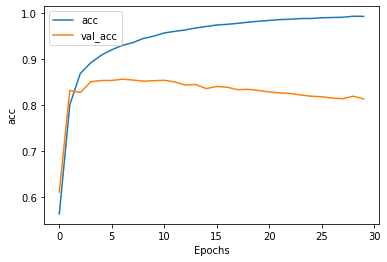

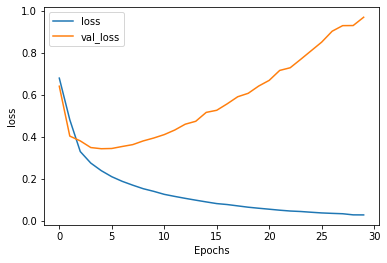

In [16]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

# Predict the sentences

In [17]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding="post", truncating="post")
print(model.predict(padded))

[[9.674928e-01]
 [7.926742e-05]]
